In [1]:
import pandas as pd
df=pd.read_csv("IMDB Dataset.csv")


In [2]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
tfidf=TfidfVectorizer(use_idf=True,
                     norm='l2',
                     smooth_idf=True)
y=df.sentiment.values
x=tfidf.fit_transform(df['review'].values.astype('U'))
with open('vectorizer.sav', 'wb') as file:
    pickle.dump(tfidf,file)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5)

In [7]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=5,
                        scoring='accuracy',
                        random_state=0,
                        n_jobs=-1,
                        verbose=3,
                        max_iter=300).fit(x_train,y_train)
saved_model=open('saved_model.sav','wb')
pickle.dump(clf,saved_model)
saved_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


In [8]:
filename='saved_model.sav'
saved_clf=pickle.load(open(filename,'rb'))

In [9]:
saved_clf.score(x_test,y_test)

0.89632

In [10]:
import re
import nltk
from nltk.corpus import stopwords
import pickle
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'\W+', ' ', text).lower()
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    # Convert the list of tokens to a string
    text = ' '.join(tokens)
    return text
def extract_features(text):
    # Load the vectorizer from the binary file
    vectorizer = pickle.load(open('vectorizer.sav', 'rb'))
    # Transform the preprocessed text to a feature vector
    feature_vector = vectorizer.transform([text])
    return feature_vector

In [11]:
text = "The movie was very good!! Fantastic"
preprocessed_text = preprocess_text(text)
feature_vector = extract_features(preprocessed_text)
prediction =clf.predict(feature_vector)
if(prediction==0):
    print("Negative")
else:
    print("Positive")

Positive


# TRAIN ON MOVIE REVIEW

In [12]:
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

    

# Load the test data
test_df = pd.read_csv("dataset1.csv")
test_df.columns = ['review', 'sentiment']
print(test_df.head(10))

                                              review  sentiment
0  I always wrote this series off as being a comp...          0
1  1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...          0
2  This movie was so poorly written and directed ...          0
3  The most interesting thing about Miryang (Secr...          1
4  when i first read about "berlin am meer" i did...          0
5  I saw this film on September 1st, 2005 in Indi...          1
6  I saw a screening of this movie last night. I ...          0
7  William Hurt may not be an American matinee id...          1
8  IT IS A PIECE OF CRAP! not funny at all. durin...          0
9  I'M BOUT IT(1997)<br /><br />Developed & publi...          0


In [13]:
vectorizer = pickle.load(open('vectorizer.sav', 'rb'))

X_new=vectorizer.transform(test_df['review'])
y_new=test_df['sentiment']
y_pred=saved_clf.predict(X_new)
saved_clf.score(X_new,y_new)

0.9262

Confusion Matrix : 
[[2282  213]
 [ 156 2349]]
Confusion matrix:
[[2282  213]
 [ 156 2349]]


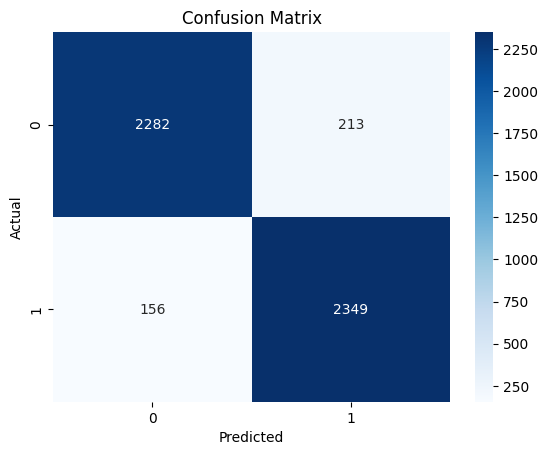

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the confusion matrix
print("Confusion Matrix : ")
print(metrics.confusion_matrix(test_df['sentiment'], y_pred))
cm = metrics.confusion_matrix(y_new, y_pred)
print(f'Confusion matrix:\n{cm}')

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
print(metrics.classification_report(test_df['sentiment'], y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2495
           1       0.92      0.94      0.93      2505

    accuracy                           0.93      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.93      0.93      0.93      5000

